# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import string
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Load Datasets

In [3]:
#change the path of the files as per your system
aisles=pd.read_csv(r"C:\Users\Arpita\Downloads\instacart-market-basket-analysis\Instakart\aisles.csv")
dept=pd.read_csv(r"C:\Users\Arpita\Downloads\instacart-market-basket-analysis\Instakart\departments.csv")
order=pd.read_csv(r"C:\Users\Arpita\Downloads\instacart-market-basket-analysis\Instakart\orders.csv")
prod=pd.read_csv(r"C:\Users\Arpita\Downloads\instacart-market-basket-analysis\Instakart\products.csv")
sales_prior=pd.read_csv(r"C:\Users\Arpita\Downloads\instacart-market-basket-analysis\Instakart\order_products__prior.csv")
ord_train=pd.read_csv(r"C:\Users\Arpita\Downloads\instacart-market-basket-analysis\Instakart\order_products__train.csv")

# EDA

## 1. Aisles

In [4]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
print("Number of rows: ", aisles.shape[0])
print("Number of columns: ", aisles.shape[1])

Number of rows:  134
Number of columns:  2


## check missing values

In [6]:
print(aisles.isnull().sum())

aisle_id    0
aisle       0
dtype: int64


## 2. Departments

In [7]:
dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [8]:
print("Number of rows: ", dept.shape[0])
print("Number of columns: ", dept.shape[1])

Number of rows:  21
Number of columns:  2


In [9]:
print(dept.isnull().sum())

department_id    0
department       0
dtype: int64


In [10]:
dept.dtypes

department_id     int64
department       object
dtype: object

## 3. Products

In [11]:
prod.head(3)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7


In [12]:
prod.tail(3)

,product_id,product_name,aisle_id,department_id
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8
49687,49688,Fresh Foaming Cleanser,73,11


In [13]:
print("Number of rows and columns: ", prod.shape)

Number of rows and columns:  (49688, 4)


In [14]:
prod.nunique()

product_id       49688
product_name     49688
aisle_id           134
department_id       21
dtype: int64

In [15]:
print(prod.isnull().sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


## 4. Orders

In [16]:
order.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0


In [17]:
order.tail(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0
3421082,272231,206209,train,14,6,14,30.0


In [18]:
print("Number of rows: ", order.shape[0])
print("Number of columns: ", order.shape[1])

Number of rows:  3421083
Number of columns:  7


In [19]:
print("The columns of our dataset are: \n")
for i in range(len(list(order.columns))):
    print(list(order.columns)[i])
    
print(order.columns)

The columns of our dataset are: 

order_id
user_id
eval_set
order_number
order_dow
order_hour_of_day
days_since_prior_order
Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')


In [20]:
order.nunique()

order_id                  3421083
user_id                    206209
eval_set                        3
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
dtype: int64

In [21]:
print(list(order['eval_set'].unique()))
print('\n')
print(list(order['order_dow'].unique()))

['prior', 'train', 'test']


[2, 3, 4, 1, 5, 0, 6]


missing values --> remove missing values or replace missing 
1. remove rows or columns 
2. replace --> specific values --> 
a) if data has outliers --> mean is sensitive to outliers --> replace with median/mode --> categorical/numerical 

In [22]:
print(order.isnull().sum())

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64


## missing values present in order.csv. Need to handle them. 

In [23]:
order.dtypes

order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

## 5. Prior Orders

In [24]:
sales_prior.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0


In [25]:
sales_prior.tail(3)

,order_id,product_id,add_to_cart_order,reordered
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1
32434488,3421083,5020,10,1


In [26]:
print("Number of rows: ", sales_prior.shape[0])
print("Number of columns: ", sales_prior.shape[1])

Number of rows:  32434489
Number of columns:  4


In [27]:
print("The columns of our dataset are: \n")
print(sales_prior.columns)

The columns of our dataset are: 

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')


In [28]:
sales_prior.nunique()

order_id             3214874
product_id             49677
add_to_cart_order        145
reordered                  2
dtype: int64

In [29]:
print(sales_prior.isnull().sum())

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


## 6. order_products_train

In [30]:
ord_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [31]:
print("Number of rows: ", sales_prior.shape[0])
print("Number of columns: ", sales_prior.shape[1])

Number of rows:  32434489
Number of columns:  4


In [32]:
ord_train.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [33]:
print(ord_train.isnull().sum())

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


In [34]:
ord_train.nunique()

order_id             131209
product_id            39123
add_to_cart_order        80
reordered                 2
dtype: int64

# EDA Step 1: Cleaning

### Handle missing values

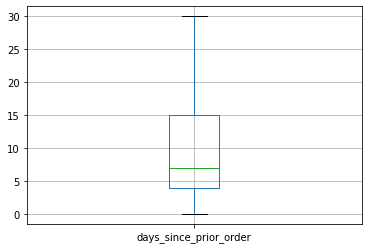

In [35]:
order.boxplot(column='days_since_prior_order', return_type='axes');

In [36]:
order['days_since_prior_order'][1:5]

1    15.0
2    21.0
3    29.0
4    28.0
Name: days_since_prior_order, dtype: float64

## Though it's datatype is float, but as we are talking about no of days, it will be considered as discrete values

In [37]:
daymed=(order['days_since_prior_order'].median())
print('Mean of days sice last order = ', daymed)
print('\n')
order['days_since_prior_order']=order['days_since_prior_order'].fillna(daymed)
print(order.isnull().sum())

Mean of days sice last order =  7.0


order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


In [38]:
print(list(sales_prior['reordered'].unique()))  # it has been converted to yes or no for better data visualization
sales_prior.reordered=sales_prior.reordered.astype(str)
sales_prior['reordered'] = np.where((sales_prior.reordered=='1'), 'Yes', sales_prior.reordered)
sales_prior['reordered'] = np.where((sales_prior.reordered=='0'), 'No', sales_prior.reordered)
print(list(sales_prior['reordered'].unique()))

[1, 0]
['Yes', 'No']


In [39]:
print(list(order['order_dow'].unique()))
order.order_dow=order.order_dow.astype(str)
order['order_dow'] = np.where((order.order_dow=='0'), 'Sunday', order.order_dow)
order['order_dow'] = np.where((order.order_dow=='1'), 'Monday', order.order_dow)
order['order_dow'] = np.where((order.order_dow=='2'), 'Tuesday', order.order_dow)
order['order_dow'] = np.where((order.order_dow=='3'), 'Wednesday', order.order_dow)
order['order_dow'] = np.where((order.order_dow=='4'), 'Thursday', order.order_dow)
order['order_dow'] = np.where((order.order_dow=='5'), 'Friday', order.order_dow)
order['order_dow'] = np.where((order.order_dow=='6'), 'Saturday', order.order_dow)
print(list(order['order_dow'].unique()))

[2, 3, 4, 1, 5, 0, 6]
['Tuesday', 'Wednesday', 'Thursday', 'Monday', 'Friday', 'Sunday', 'Saturday']


In [40]:
dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [41]:
prod.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [42]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [43]:
mergeone=pd.merge(prod,aisles,how='left',left_on='aisle_id',right_on='aisle_id')


In [44]:
mergeone.head()

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,2,All-Seasons Salt,104,13,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation


In [46]:
print(aisles.shape)
print(prod.shape)
mergeone.shape

(134, 2)
(49688, 4)


(49688, 5)

In [47]:
mergetwo=pd.merge(mergeone,dept,how='left',left_on='department_id',right_on='department_id')

In [48]:
prodnew=mergetwo.drop(['aisle_id','department_id'], axis=1)
prodnew

,product_id,product_name,aisle,department
0,1,Chocolate Sandwich Cookies,cookies cakes,snacks
1,2,All-Seasons Salt,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,frozen meals,frozen
4,5,Green Chile Anytime Sauce,marinades meat preparation,pantry
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",spirits,alcohol
49684,49685,En Croute Roast Hazelnut Cranberry,frozen vegan vegetarian,frozen
49685,49686,Artisan Baguette,bread,bakery
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,cat food care,pets


In [49]:
sales_prior_new =pd.merge(sales_prior,prodnew,how='left',left_on='product_id',right_on='product_id')

In [52]:
sales_prior_new.shape

(32434489, 7)

In [53]:
sales_prior_new.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle,department
0,2,33120,1,Yes,Organic Egg Whites,eggs,dairy eggs
1,2,28985,2,Yes,Michigan Organic Kale,fresh vegetables,produce
2,2,9327,3,No,Garlic Powder,spices seasonings,pantry
3,2,45918,4,Yes,Coconut Butter,oils vinegars,pantry
4,2,30035,5,No,Natural Sweetener,baking ingredients,pantry


# EDA Step 2: Visualization

In [131]:
sales_prior_new.head()
print(sales_prior_new.shape)
sales_prior_new.order_id.value_counts()

(32434489, 7)


1564244    145
790903     137
61355      127
2970392    121
2069920    116
          ... 
1515         1
2112933      1
2315126      1
483627       1
1771976      1
Name: order_id, Length: 3214874, dtype: int64

### When to draw a pie chart? 
### What is the difference b/w pie chart and bar graph 

           order_id  product_id  add_to_cart_order  product_name     aisle  \
reordered                                                                    
No         13307953    13307953           13307953      13307953  13307953   
Yes        19126536    19126536           19126536      19126536  19126536   

           department  
reordered              
No           13307953  
Yes          19126536  


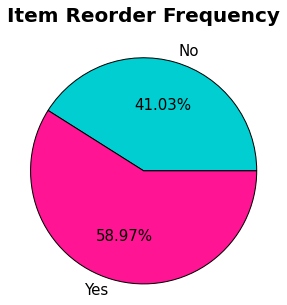

In [127]:
sales_grp_reorder=sales_prior_new.groupby('reordered').count()
print(sales_grp_reorder)
data=sales_grp_reorder.order_id  #pie_chart will be based on order_id
plt.pie(data, labels = sales_grp_reorder.index, radius=1.3, autopct='%2.2f%%', textprops={"fontsize":15}, wedgeprops={"edgecolor":"black"}, colors = ['darkturquoise', 'deeppink'])
plt.title('Item Reorder Frequency', fontdict = {'size' : '20', 'fontweight' : 'bold'}, pad=40)
plt.show()

          order_id  user_id  order_number  order_dow  order_hour_of_day  \
eval_set                                                                  
prior      3214874  3214874       3214874    3214874            3214874   
test         75000    75000         75000      75000              75000   
train       131209   131209        131209     131209             131209   

          days_since_prior_order  
eval_set                          
prior                    3214874  
test                       75000  
train                     131209  


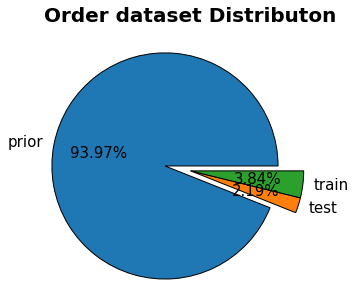

In [134]:
ord_by_eval=order.groupby('eval_set').count()
print(ord_by_eval)
data=ord_by_eval.order_id
plt.pie(data, labels = ord_by_eval.index, radius=1.3, autopct='%2.2f%%', textprops={"fontsize":15}, wedgeprops={"edgecolor":"black"}, explode=[0.3,0,0])
plt.title('Order dataset Distributon', fontdict = {'size' : '20', 'fontweight' : 'bold'}, pad=40)
plt.show()

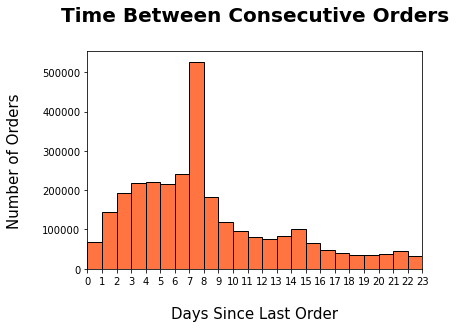

In [135]:


plt.title('Time Between Consecutive Orders', fontdict = {'size' : '20', 'fontweight' : 'bold'}, pad=30)
hist.set_ylabel("Number of Orders", fontsize=15, labelpad=20)
hist.set_xlabel("Days Since Last Order", fontsize=15, labelpad=20)
hist.set_xlim(1, 23)
hist.xaxis.set_ticks(np.arange(0,24))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)
plt.show()

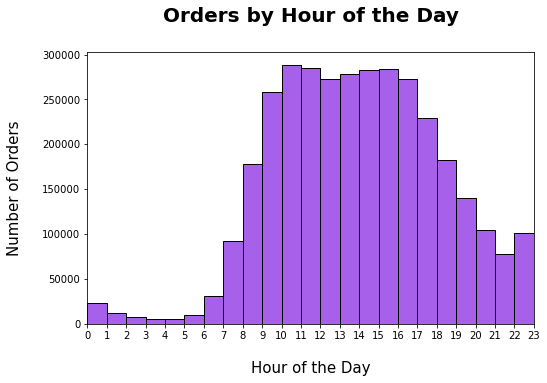

In [136]:
plt.figure(figsize=(8,5))


hist=sns.histplot(data=order, x=order.order_hour_of_day, stat="count", binwidth=1, color='blueviolet')


plt.title('Orders by Hour of the Day', fontdict = {'size' : '20', 'fontweight' : 'bold'}, pad=30)
hist.set_ylabel("Number of Orders", fontsize=15, labelpad=20)
hist.set_xlabel("Hour of the Day", fontsize=15, labelpad=20)
hist.set_xlim(1, 23)
hist.xaxis.set_ticks(np.arange(0,24))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)
plt.show()

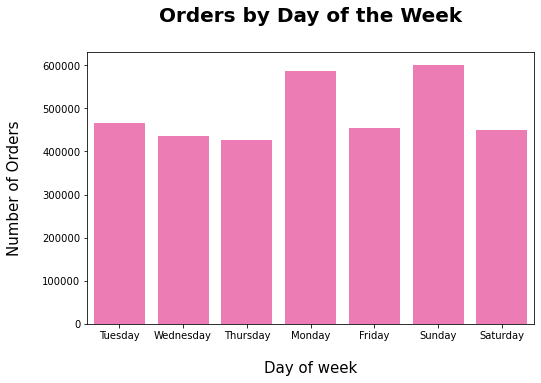

In [137]:
plt.figure(figsize=(8,5))
sns.countplot(x="order_dow", data=order, color='hotpink')
plt.ylabel('Number of Orders', fontsize=15, labelpad=20)
plt.xlabel('Day of week', fontsize=15, labelpad=20)
plt.title('Orders by Day of the Week', fontdict = {'size' : '20', 'fontweight' : 'bold'}, pad=30)
plt.show()

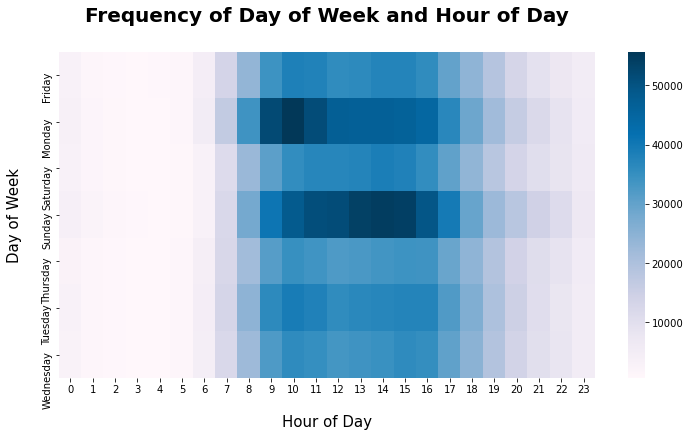

In [138]:
grouped_df = order.groupby(["order_dow", "order_hour_of_day"])["order_id"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_id')
plt.figure(figsize=(12,6))

sns.heatmap(grouped_df, cmap='PuBu')


plt.title('Frequency of Day of Week and Hour of Day', fontdict = {'size' : '20', 'fontweight' : 'bold'}, pad=30)
plt.xlabel('Hour of Day', fontsize=15, labelpad=20)
plt.ylabel('Day of Week', fontsize=15, labelpad=20)
plt.show()

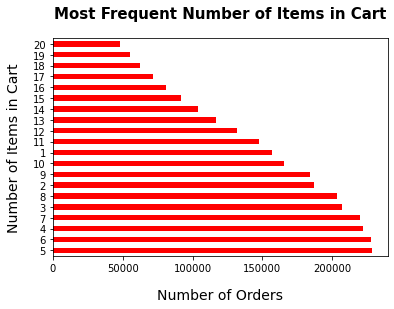

In [141]:
salesbyorder=sales_prior_new.groupby('order_id').count()
#print(salesbyorder.head(10))
plt.title("Most Frequent Number of Items in Cart", fontsize=15, fontweight='bold', pad=20)                                               
salesbyorder["add_to_cart_order"].value_counts().head(20).plot(kind="barh",color="red")     
plt.ylabel("Number of Items in Cart", fontsize=14, labelpad=12)
plt.xlabel("Number of Orders", fontsize=14, labelpad=15)
plt.grid(False)
plt.show()

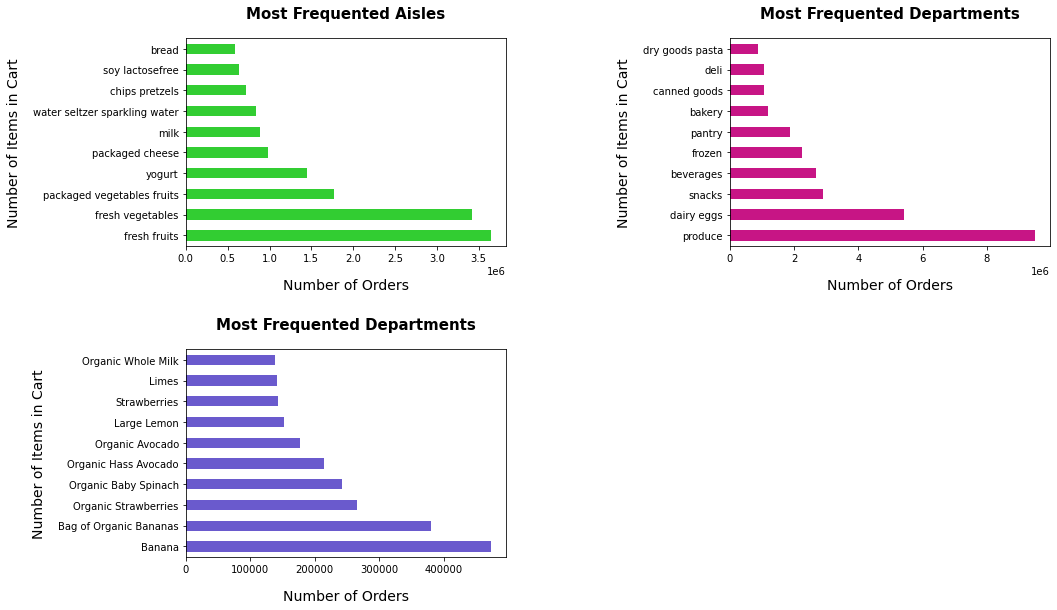

In [143]:
fig, ax = plt.subplots(1,1,figsize=(12, 12))

plt.subplot(2,2,1)
plt.title("Most Frequented Aisles", fontsize=15, fontweight='bold', pad=20)                                               
sales_prior_new["aisle"].value_counts().head(10).plot(kind="barh",color="limegreen")     
plt.ylabel("Number of Items in Cart", fontsize=14, labelpad=12)
plt.xlabel("Number of Orders", fontsize=14, labelpad=15)
plt.grid(False)

plt.subplot(2,2,2)
plt.title("Most Frequented Departments", fontsize=15, fontweight='bold', pad=20)                                               
sales_prior_new["department"].value_counts().head(10).plot(kind="barh",color="mediumvioletred")     
plt.ylabel("Number of Items in Cart", fontsize=14, labelpad=12)
plt.xlabel("Number of Orders", fontsize=14, labelpad=15)
plt.grid(False)

plt.subplot(2,2,3)
plt.title("Most Frequented Departments", fontsize=15, fontweight='bold', pad=20)                                               
sales_prior_new["product_name"].value_counts().head(10).plot(kind="barh",color="slateblue")     
plt.ylabel("Number of Items in Cart", fontsize=14, labelpad=12)
plt.xlabel("Number of Orders", fontsize=14, labelpad=15)
plt.grid(False)


plt.subplots_adjust(left=0, bottom=0.1, right=1, top=0.7, wspace=0.7, hspace=0.5)
plt.show()

In [146]:
sales_prior['reordered']

0           Yes
1           Yes
2            No
3           Yes
4            No
           ... 
32434484    Yes
32434485     No
32434486     No
32434487    Yes
32434488    Yes
Name: reordered, Length: 32434489, dtype: object

### 
1. When do people reorder? 
2. How frequently they order? 
3. How mant prior orders are there? 
4. How many items people do buy at a time? 
5. What are the bestsellers? 
6. Organic or non organic? which is more ? 
7. Which two products are going to be ordered together again? 


In [150]:
sales_prior['reordered'] = np.where((sales_prior.reordered=='Yes'), '1', sales_prior.reordered)
sales_prior['reordered'] = np.where((sales_prior.reordered=='No'), '0', sales_prior.reordered)
print((sales_prior['reordered']))
sales_prior.reordered=sales_prior.reordered.astype(int)
print(list(sales_prior['reordered'].unique()))

0           1
1           1
2           0
3           1
4           0
           ..
32434484    1
32434485    0
32434486    0
32434487    1
32434488    1
Name: reordered, Length: 32434489, dtype: object
[1, 0]


In [151]:
order.order_dow=order.order_dow.astype(str)
order['order_dow'] = np.where((order.order_dow=='Sunday'), '0', order.order_dow)
order['order_dow'] = np.where((order.order_dow=='Monday'), '1', order.order_dow)
order['order_dow'] = np.where((order.order_dow=='Tuesday'), '2', order.order_dow)
order['order_dow'] = np.where((order.order_dow=='Wednesday'), '3', order.order_dow)
order['order_dow'] = np.where((order.order_dow=='Thursday'), '4', order.order_dow)
order['order_dow'] = np.where((order.order_dow=='Friday'), '5', order.order_dow)
order['order_dow'] = np.where((order.order_dow=='Saturday'), '6', order.order_dow)
sales.reordered=sales.reordered.astype(int)
print(list(order['order_dow'].unique()))

['2', '3', '4', '1', '5', '0', '6']
